In [ ]:
pip install kmeans


  Created wheel for kmeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11796 sha256=809758d3c8f90194006701f4b3061cd6a8a14b1ed6a1380d0050cea0d061e9eb
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built kmeans


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($),Unnamed: 3
0,Rob,27,70000,NaN
1,Michael,29,90000,NaN
2,Mohan,29,61000,NaN
3,Ismail,28,60000,NaN
4,Kory,42,150000,NaN


Text(0, 0.5, 'Income')

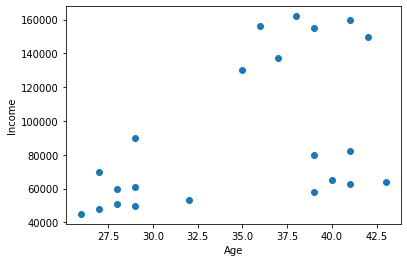

In [ ]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_prdeicted

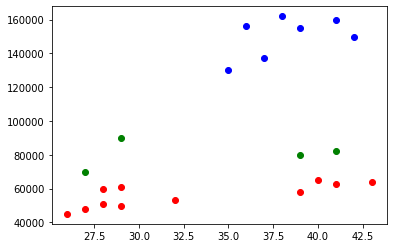

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='green')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']]=scaler.fit_transform(df[['Income($)']]) 
scaler.fit(df[['Age']])
df[['Age']]=scaler.fit_transform(df[['Age']]) 


In [ ]:
df.head()

,Name,Age,Income($),Unnamed: 3,cluster
0,Rob,0.058824,0.213675,NaN,2
1,Michael,0.176471,0.384615,NaN,2
2,Mohan,0.176471,0.136752,NaN,0
3,Ismail,0.117647,0.128205,NaN,0
4,Kory,0.941176,0.897436,NaN,1


In [ ]:
km=KMeans(n_clusters=3)
y_prdeicted=km.fit_predict(df[['Age','Income($)']])

In [ ]:
df['cluster']=y_predicted

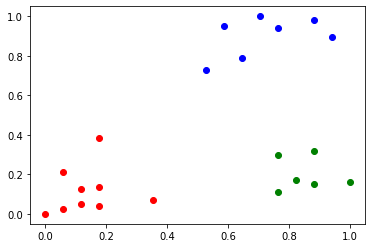

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='green')

In [ ]:
sse=[]
K_rng=range(1,10)
for k in K_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

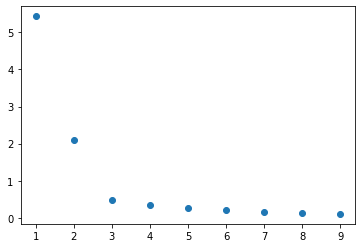

In [ ]:
plt.scatter(K_rng,sse)